# Question 3: Has COVID had an impact during holiday seasons? 

### COVID Start & End Date:
----------------------------------------------------------------
* Start Date: January 24, 2020
* End Date: February 24, 2022 => [Article from Chicago.gov](https://www.chicago.gov/city/en/sites/covid-19/home/health-orders.html)

In [1]:
import pandas as pd
import os
from zipfile import ZipFile
import holidays
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests 
import json

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 8
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10, 4)

In [2]:
# Zip File Extraction
    # ? Insead of extracting one zip file at a given time, we will extract all the zip files using a for loop
def unzip_files(zip_path, extract_path):
    for zip_path in zip_paths:
        with ZipFile (zip_path, 'r') as zObject:
        # * Extracting all memebters of the zip files into a specific location
            zObject.extractall(
                path = extract_path
            )
# * Usage zip function - Variables:
zip_paths = ["/Users/galbeeir/Desktop/git/crime_analysis/filtered_1.zip", "/Users/galbeeir/Desktop/git/crime_analysis/filtered_2.zip"]
extract_path = "/Users/galbeeir/Desktop/git/crime_analysis/"

# * Executing the zip function
unzip_files(zip_paths, extract_path)


In [3]:
# * List of directories
datasets_1 = "/Users/galbeeir/Desktop/git/crime_analysis/CSVs"

# * List all the files from the directory
file_list_1 = os.listdir(datasets_1)

# * Merge all files stored in file_list
crime_df = pd.DataFrame()

# * Merge all files stored in file_list_1
for file in file_list_1:

    if file.endswith(".csv"):
        file_path = os.path.join(datasets_1, file)
        df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
        crime_df = pd.concat([crime_df, df])

     
crime_df.head()


/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_5922/3239953675.py:15: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_5922/3239953675.py:15: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_5922/3239953675.py:15: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_5922/3239953675.py:15: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=',', encoding='utf-8')
/var/folders/06/

,Unnamed: 0,ID,Case Number,Date,Year,Updated On,Block,Primary Type,Location Description,Arrest,Domestic,Police District,Ward,Community Area,Latitude,Longitude
0,807159,12581817,JF100052,2022-01-01 00:00:00,2022,2023-01-03 15:46:28,080XX S CRANDON AVE,BATTERY,RESIDENCE,True,True,4,8.0,South Chicago,41.749260,-87.56863
1,807160,12581845,JF100074,2022-01-01 00:00:00,2022,2023-01-03 15:46:28,013XX S MICHIGAN AVE,BATTERY,APARTMENT,True,True,1,3.0,Near South Side,41.865147,-87.62410
2,807161,12581875,JF100038,2022-01-01 00:00:00,2022,2023-01-03 15:46:28,116XX S CHURCH ST,CRIMINAL DAMAGE,RESIDENCE,False,False,22,34.0,Morgan Park,41.681515,-87.67086
3,807162,12581981,JF100073,2022-01-01 00:00:00,2022,2023-01-03 15:46:28,133XX S CORLISS AVE,CRIMINAL DAMAGE,APARTMENT,False,False,5,9.0,Riverdale,41.653637,-87.60207
4,807163,12582064,JF100392,2022-01-01 00:00:00,2022,2023-01-03 15:46:28,019XX S HALSTED ST,THEFT,VEHICLE NON-COMMERCIAL,False,False,12,11.0,Lower West Side,41.856380,-87.64660


In [4]:
# Dropping the unamed column
crime_df.drop(['Unnamed: 0', 'Block'], axis=1, inplace=True)

In [5]:
# Transforming the data type to date format
crime_df['Date'] = pd.to_datetime(
    crime_df['Date'],
    errors = 'coerce',
    infer_datetime_format=True, 
)

In [6]:
crime_df['Updated On'] = pd.to_datetime(
    crime_df['Updated On'],
    errors = 'coerce',
    infer_datetime_format=True, 
    format ='%T'
)

In [7]:
# Transforming the Ward to & Police destricts to Category
crime_df = crime_df.astype({'Police District': 'category'})

In [8]:
crime_df['Ward'] = pd.to_numeric(crime_df['Ward'], errors='coerce').astype('Int8')

In [9]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028014 entries, 0 to 202875
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1028014 non-null  int64         
 1   Case Number           1028014 non-null  object        
 2   Date                  1028014 non-null  datetime64[ns]
 3   Year                  1028014 non-null  int64         
 4   Updated On            1028014 non-null  datetime64[ns]
 5   Primary Type          1028014 non-null  object        
 6   Location Description  1028014 non-null  object        
 7   Arrest                1028014 non-null  bool          
 8   Domestic              1028014 non-null  bool          
 9   Police District       1028014 non-null  category      
 10  Ward                  1027968 non-null  Int8          
 11  Community Area        1028014 non-null  object        
 12  Latitude              1028014 non-null  flo

In [10]:
crime_df.head()

,ID,Case Number,Date,Year,Updated On,Primary Type,Location Description,Arrest,Domestic,Police District,Ward,Community Area,Latitude,Longitude
0,12581817,JF100052,2022-01-01,2022,2023-01-03 15:46:28,BATTERY,RESIDENCE,True,True,4,8,South Chicago,41.749260,-87.56863
1,12581845,JF100074,2022-01-01,2022,2023-01-03 15:46:28,BATTERY,APARTMENT,True,True,1,3,Near South Side,41.865147,-87.62410
2,12581875,JF100038,2022-01-01,2022,2023-01-03 15:46:28,CRIMINAL DAMAGE,RESIDENCE,False,False,22,34,Morgan Park,41.681515,-87.67086
3,12581981,JF100073,2022-01-01,2022,2023-01-03 15:46:28,CRIMINAL DAMAGE,APARTMENT,False,False,5,9,Riverdale,41.653637,-87.60207
4,12582064,JF100392,2022-01-01,2022,2023-01-03 15:46:28,THEFT,VEHICLE NON-COMMERCIAL,False,False,12,11,Lower West Side,41.856380,-87.64660


In [11]:
# Get the list of holidays for a specific country/region
us_holidays = holidays.US()

In [12]:
crime_df['Is_Holiday'] = crime_df['Date'].apply(lambda x: x in us_holidays)

In [13]:
# Define a function to receive the holiday's name
def get_holiday_name(date):
    for holiday_date, holiday_name in us_holidays.items():
        if date.date() == holiday_date:
            return holiday_name
    return None

In [14]:
crime_df['Holiday_name'] = crime_df['Date'].apply(get_holiday_name)

In [15]:
crime_df.sort_values('Year', inplace=True)

In [16]:
holiday_df = crime_df.loc[crime_df['Is_Holiday']==True]

In [17]:
holiday_df['Holiday_name'].unique()

array(['Memorial Day', 'Independence Day', "Washington's Birthday",
       "New Year's Day", 'Martin Luther King Jr. Day', 'Veterans Day',
       'Christmas Day', 'Thanksgiving', 'Labor Day', 'Columbus Day',
       'Independence Day (Observed)', 'Christmas Day (Observed)',
       "New Year's Day (Observed)",
       'Juneteenth National Independence Day (Observed)',
       'Juneteenth National Independence Day'], dtype=object)

In [18]:
# Replacing duplicated holidays
    # ? As we can see, the following holidays are duplicates => Independence Day (Observed), Christmas Day (Observed), New Year's Day (Observed), Juneteenth National Independence Day (Observed). 
holiday_df.replace({
    'Independence Day (Observed)': 'Independence Day',
    'Christmas Day (Observed)': 'Christmas Day',
    "New Year's Day (Observed)": "New Year's Day",
    'Juneteenth National Independence Day (Observed)': 'Juneteenth National Independence Day'
}, inplace=True)

/var/folders/06/47q5ms9540g4mnz8nnnyl32m0000gn/T/ipykernel_5922/4089363784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_df.replace({


In [19]:
# See confirmation for the amount of holidays in USA here https://www.commerce.gov/hr/employees/leave/holidays
holiday_df['Holiday_name'].nunique()

11

In [20]:
holiday_df = holiday_df.reset_index(drop=True)

In [21]:
holiday_df.head()

,ID,Case Number,Date,Year,Updated On,Primary Type,Location Description,Arrest,Domestic,Police District,Ward,Community Area,Latitude,Longitude,Is_Holiday,Holiday_name
0,11703465,JC282903,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,THEFT,STREET,False,False,12,25,Near West Side,41.863590,-87.645310,True,Memorial Day
1,11702897,JC282303,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,CRIMINAL DAMAGE,STREET,False,False,15,37,Austin,41.886642,-87.763405,True,Memorial Day
2,11703024,JC281136,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,BATTERY,RESIDENCE,False,True,16,38,Portage Park,41.964096,-87.786766,True,Memorial Day
3,11703083,JC282234,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,THEFT,VEHICLE NON-COMMERCIAL,False,False,14,32,Logan Square,41.928413,-87.688710,True,Memorial Day
4,11703136,JC281123,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,BATTERY,HOTEL/MOTEL,False,True,18,42,Near North Side,41.894950,-87.623620,True,Memorial Day


### Creating 3 DataFrames (during, post, and prior COVID) based on holiday_df

In [22]:
conditions = [
    holiday_df['Date'] <= "2020-01-24",
    (holiday_df['Date'] >= "2020-01-24") & (holiday_df['Date'] <= "2022-02-28"),
    holiday_df['Date'] > "2022-02-28"
]

choices = ['Prior COVID Holidays', 'During COVID Holidays', 'Post COVID Holidays']

holiday_df['COVID Period'] = np.select(conditions, choices, default ='None')

In [23]:
holiday_df.head()

,ID,Case Number,Date,Year,Updated On,Primary Type,Location Description,Arrest,Domestic,Police District,Ward,Community Area,Latitude,Longitude,Is_Holiday,Holiday_name,COVID Period
0,11703465,JC282903,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,THEFT,STREET,False,False,12,25,Near West Side,41.863590,-87.645310,True,Memorial Day,Prior COVID Holidays
1,11702897,JC282303,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,CRIMINAL DAMAGE,STREET,False,False,15,37,Austin,41.886642,-87.763405,True,Memorial Day,Prior COVID Holidays
2,11703024,JC281136,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,BATTERY,RESIDENCE,False,True,16,38,Portage Park,41.964096,-87.786766,True,Memorial Day,Prior COVID Holidays
3,11703083,JC282234,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,THEFT,VEHICLE NON-COMMERCIAL,False,False,14,32,Logan Square,41.928413,-87.688710,True,Memorial Day,Prior COVID Holidays
4,11703136,JC281123,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,BATTERY,HOTEL/MOTEL,False,True,18,42,Near North Side,41.894950,-87.623620,True,Memorial Day,Prior COVID Holidays


### Amount of Offences Per primary Type: Prior, During, and Post COVID

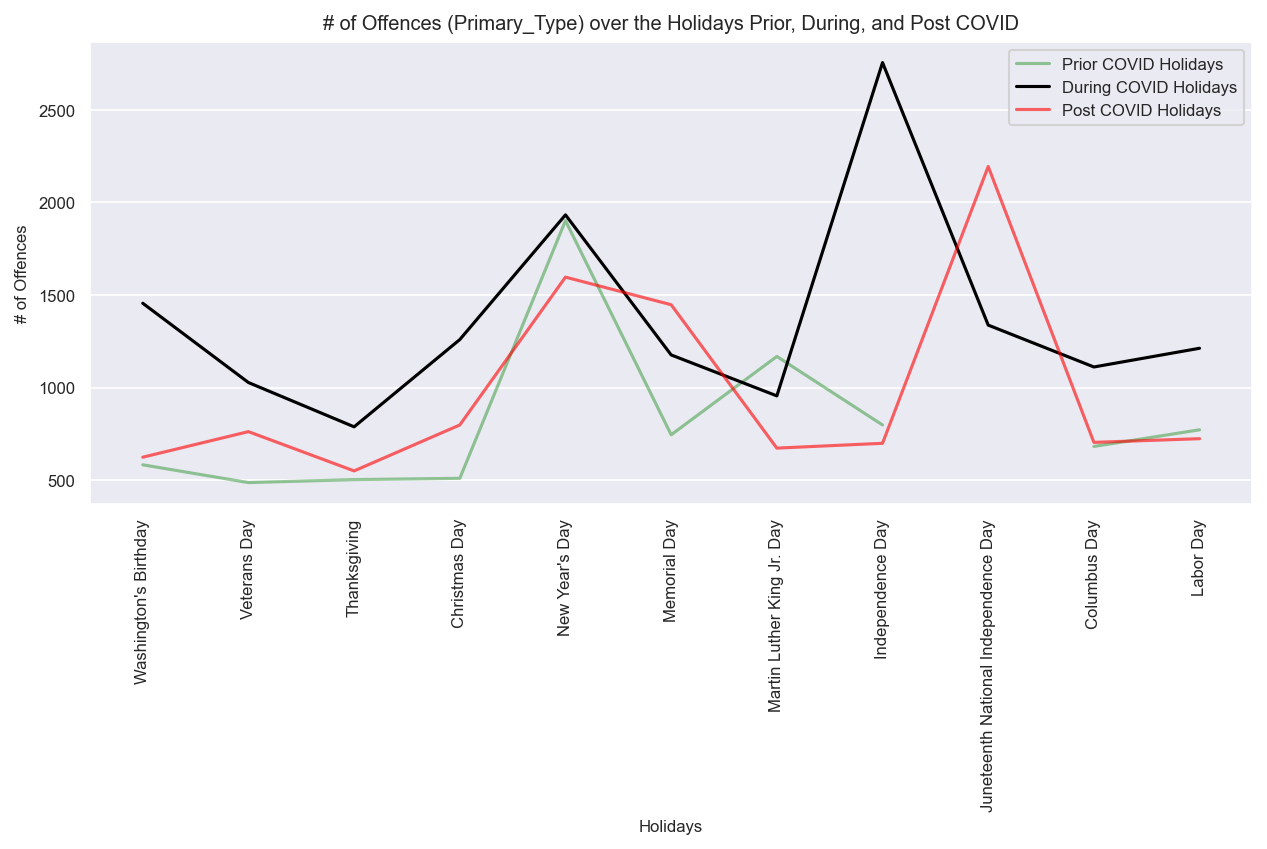

In [24]:
# Grouping Post, During, Prior data
prior_covid_holidays = holiday_df.loc[holiday_df['COVID Period'] == 'Prior COVID Holidays'].groupby('Holiday_name')['Primary Type'].count()
during_covid_holidays = holiday_df.loc[holiday_df['COVID Period'] == 'During COVID Holidays'].groupby('Holiday_name')['Primary Type'].count()
post_covid_holidays = holiday_df.loc[holiday_df['COVID Period'] == 'Post COVID Holidays'].groupby('Holiday_name')['Primary Type'].count()

# * Combine all holiday names into a single set
all_holidays = set(prior_covid_holidays.index).union(during_covid_holidays.index).union(post_covid_holidays.index)

# * Plot the line charts with the respective holiday names as x-axis labels
prior_covid_holidays.reindex(all_holidays).plot(label='Prior COVID Holidays', color='green', alpha=0.4)
during_covid_holidays.reindex(all_holidays).plot(label='During COVID Holidays', color='black')
post_covid_holidays.reindex(all_holidays).plot(label='Post COVID Holidays', color='red', alpha=0.6)

plt.xticks(range(len(all_holidays)), all_holidays, rotation=90)
plt.xlabel('Holidays')
plt.ylabel('# of Offences')
plt.title("# of Offences (Primary_Type) over the Holidays Prior, During, and Post COVID")
plt.grid(axis='x')
plt.legend()
plt.savefig("/Users/galbeeir/Desktop/git/crime_analysis/holiday_seasons/Images/offences_primary_type.png")
plt.show()

#### Insights
* During COVID-19 period, Independence Day had the highest amount of offences conducted in the city of Chicago. This might be a direct result of George Floyd's death in 2021 see articles posted in [NBC News](https://www.nbcnews.com/news/us-news/chicago-crime-complicated-truth-behind-defund-police-efforts-n1231381) and [Daily Caller](https://dailycaller.com/2021/07/05/hundreds-shot-across-america-fourth-of-july-weekend/).
    > In Chicago, 13 people were killed, and 64 people were injured, data from the Gun Violence Archives shows. The most shooting attempts occurred in Chicago – 51 of the 490 incidents.
* Post-COVID, Juneteenth had the second highest amount of offence conducted in the city of Chicago. During Juneteenth, serveral incidents of mass shootings occurred in the USA and specifically in Chicago ([Chicago Sun Times](https://chicago.suntimes.com/crime/2023/6/18/23765102/willowbrook-shooting-juneteenth)). According to [The Telegraph](https://www.telegraph.co.uk/news/2023/06/19/juneteenth-racial-slavery-reparations-drugs-crime-biden/) United States is facing some "racial issues". 
* The number of offences during COVID-19 among the following holidays almost doubled: Columbus Day, Veterans Day, and Labor Day.
* Memorial Day was the second point in our plot where the number of crimes was higher relative to the COVID period. During the weekend of Memorial Day, post-COVID, there were [53 shooting incidents in Chicago](https://abcnews.go.com/US/53-people-shot-11-fatally-violent-memorial-day/story?id=99691001#:~:text=More%20than%2050%20people%20were,weekend%20in%20Chicago%2C%20police%20said.)
* Prior to COVID-19, Juneteenth is missing offences data, with 91 offences in Thanksgiving, it might be that the data is lacking. 
* Interestingly, the Prior COVID period reached the same level of crime incidents as the period during COVID. 
* Christmas had the least amount of offences Prior to COVID-19 and the most significant decrease in crime incidents. During COVID-19 period, Martins Luther King Jr. Day had the most significant decrease in crime incidents. 


#### Assumption 
- Given the insights above, one assumption might be that the "govenment political state" has a direct influence on the amount of crime incidents in Chicago and USA in general. 


### Amount of Offences & Arrests Per primary Type: Prior, During, and Post COVID

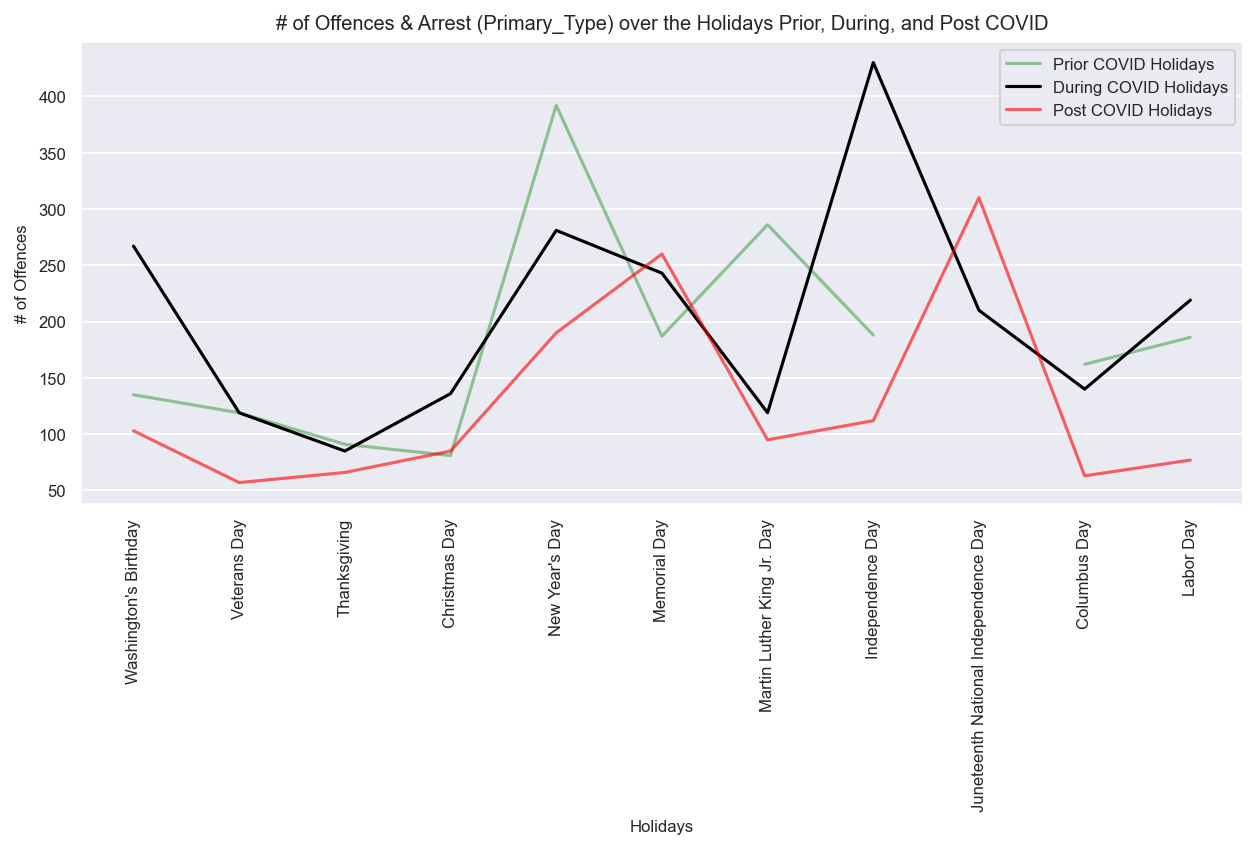

In [25]:
# Grouping Post, During, Prior data
prior_covid_holidays = holiday_df.loc[(holiday_df['COVID Period'] == 'Prior COVID Holidays') & (holiday_df['Arrest']==True)].groupby('Holiday_name')['Primary Type'].count()
during_covid_holidays = holiday_df.loc[(holiday_df['COVID Period'] == 'During COVID Holidays') & (holiday_df['Arrest']==True)].groupby('Holiday_name')['Primary Type'].count()
post_covid_holidays = holiday_df.loc[(holiday_df['COVID Period'] == 'Post COVID Holidays') & (holiday_df['Arrest']==True)].groupby('Holiday_name')['Primary Type'].count()

# * Combine all holiday names into a single set
all_holidays = set(prior_covid_holidays.index).union(during_covid_holidays.index).union(post_covid_holidays.index)

# * Plot the line charts with the respective holiday names as x-axis labels
prior_covid_holidays.reindex(all_holidays).plot(label='Prior COVID Holidays', color='green', alpha=0.4)
during_covid_holidays.reindex(all_holidays).plot(label='During COVID Holidays', color='black')
post_covid_holidays.reindex(all_holidays).plot(label='Post COVID Holidays', color='red', alpha=0.6)

plt.xticks(range(len(all_holidays)), all_holidays, rotation=90)
plt.xlabel('Holidays')
plt.ylabel('# of Offences')
plt.title("# of Offences & Arrest (Primary_Type) over the Holidays Prior, During, and Post COVID")
plt.grid(axis='x')
plt.legend()
plt.savefig("/Users/galbeeir/Desktop/git/crime_analysis/holiday_seasons/Images/offences_and_arrests.png")
plt.show()

#### Insights Arrests
Previous related insights: 
* During COVID-19 period, Independence Day had the highest amount of offences conducted in the city of Chicago. This might be a direct result of George Floyd's death in 2021 see articles posted in [NBC News](https://www.nbcnews.com/news/us-news/chicago-crime-complicated-truth-behind-defund-police-efforts-n1231381) and [Daily Caller](https://dailycaller.com/2021/07/05/hundreds-shot-across-america-fourth-of-july-weekend/).
    > In Chicago, 13 people were killed, and 64 people were injured, data from the Gun Violence Archives shows. The most shooting attempts occurred in Chicago – 51 of the 490 incidents.
* Post-COVID, Juneteenth had the second highest amount of offence conducted in the city of Chicago. During Juneteenth, serveral incidents of mass shootings occurred in the USA and specifically in Chicago ([Chicago Sun Times](https://chicago.suntimes.com/crime/2023/6/18/23765102/willowbrook-shooting-juneteenth)). According to [The Telegraph](https://www.telegraph.co.uk/news/2023/06/19/juneteenth-racial-slavery-reparations-drugs-crime-biden/) United States is facing some "racial issues". 
* Christmas had the least amount of offences Prior to COVID-19 and the most significant decrease in crime incidents. During COVID-19 period, Martins Luther King Jr. Day had the most significant decrease in crime incidents. 

New insights:
* The amount of crime incidents **with arrests** for **during** COVID-19 period and **Prior** to COVID-19 period almost doubled relative to the amount of crime incidents **post COVID-19** period. 
* Post COVID-19, Columbus Day holiday had the least amount of crime incidents that ended with an arrest relative to prior and during COVID-19 period. 
* New Year's Day, Prior COVID-19 period, had the highest amount of crime incidents with an arrests
* Marthin Luther King Jr. Day, Prior COVID-19 period had the second greatest pick in crime incidents that ended with an arrest. 


### Top 5 Offence Locations - COVID Periods

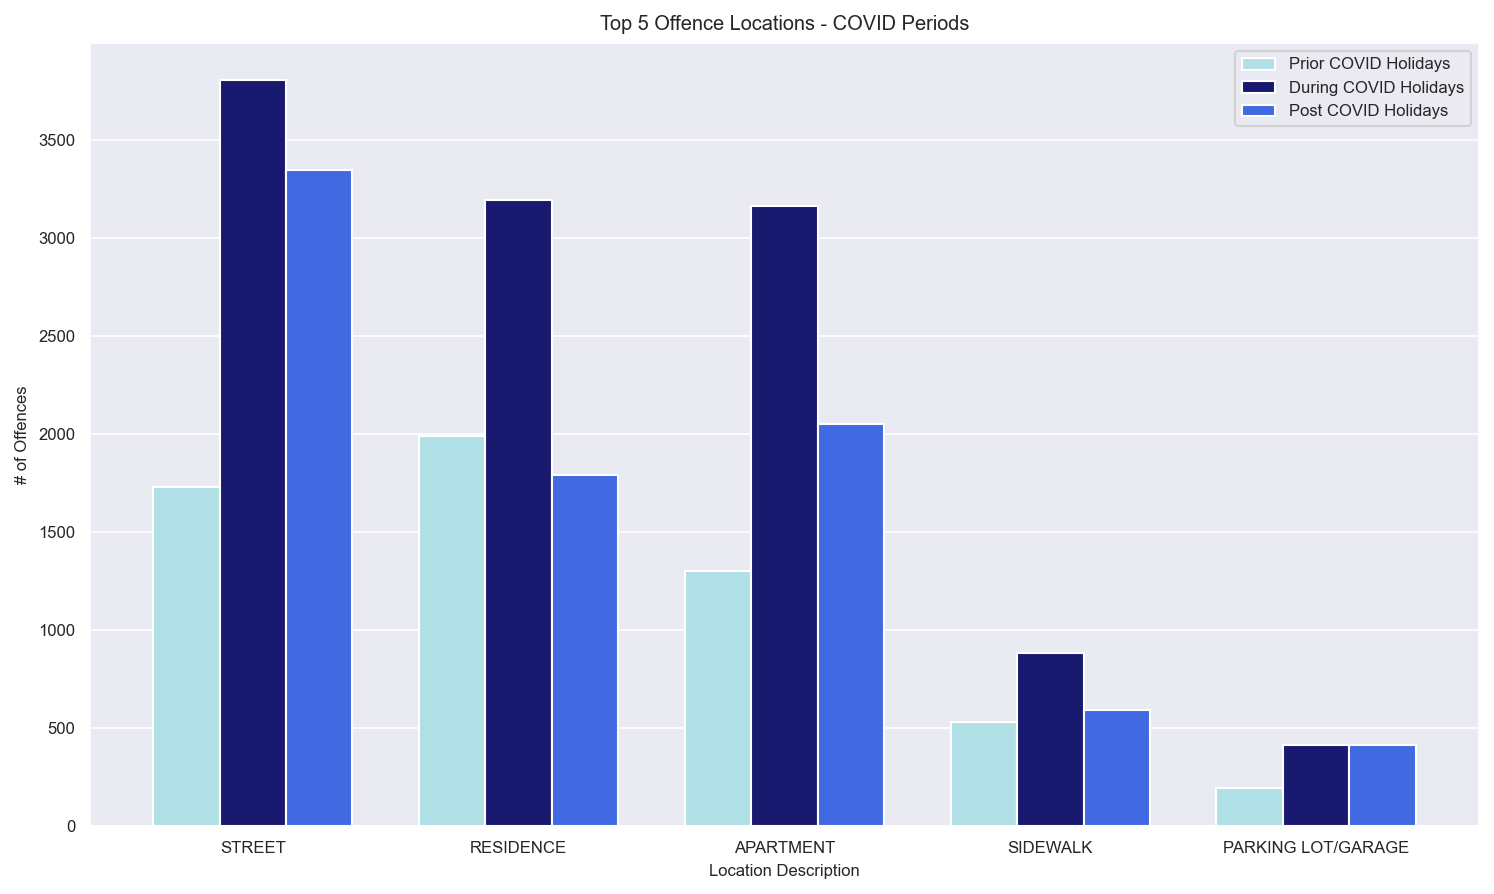

In [26]:
# Grouped bar chart for the top 5 location descriptions
locations = holiday_df.groupby('Location Description')['Holiday_name'].count().sort_values(ascending=False).iloc[:5].index
prior_covid = holiday_df.loc[holiday_df['COVID Period'] == 'Prior COVID Holidays'].groupby('Location Description')['Holiday_name'].count().reindex(locations).values
during_covid = holiday_df.loc[holiday_df['COVID Period'] == 'During COVID Holidays'].groupby('Location Description')['Holiday_name'].count().reindex(locations).values
post_covid = holiday_df.loc[holiday_df['COVID Period'] == 'Post COVID Holidays'].groupby('Location Description')['Holiday_name'].count().reindex(locations).values

# * Calculate the positions of the bars
bar_width = 0.25
x = np.arange(len(locations))
x_prior_covid = x - bar_width
x_during_covid = x
x_post_covid = x + bar_width

# * Create the grouped bar chart for each location description
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x_prior_covid, prior_covid, width=bar_width, label='Prior COVID Holidays', color='powderblue')
ax.bar(x_during_covid, during_covid, width=bar_width, color='midnightblue', label='During COVID Holidays')
ax.bar(x_post_covid, post_covid, width=bar_width, label='Post COVID Holidays', color='royalblue')

# * Set the x-axis labels and tick positions
ax.set_xticks(x)
ax.set_xticklabels(locations, rotation=0)
ax.set_xlabel('Location Description')
ax.set_ylabel('# of Offences')
ax.set_title('Top 5 Offence Locations - COVID Periods')
ax.grid(axis='x')
ax.legend()

# * Display the plot
plt.tight_layout()
plt.savefig("/Users/galbeeir/Desktop/git/crime_analysis/holiday_seasons/Images/Top5_locations.png")
plt.show()


#### Insight
* During COVID-19 period had significant more crime incidents than post or prior. The segnificace can be expalained with COVID period being almost twice as long as opposed to prior and post periods. 
* Both [NYT](https://www.nytimes.com/article/george-floyd-protests-timeline.html) and  [Chicago Suntimes](https://chicago.suntimes.com/news/2021/5/25/22419345/protests-chicago-george-floyd-anniversary-black-latino-unity-racial-reckoning) reported on large amount of protests of "black life's matter" after George's Floyd and Anthony's Alvarez got shot by a police officer. **This might explain the dencity of crime incidents in both *post and during COVID-19 period**. 
Conclusion: The amount of crime incidents during and post COVID-19 period has increased significantly relative to the prior COVID period.

### # of Offences per Community Area - Post COVID Holidays

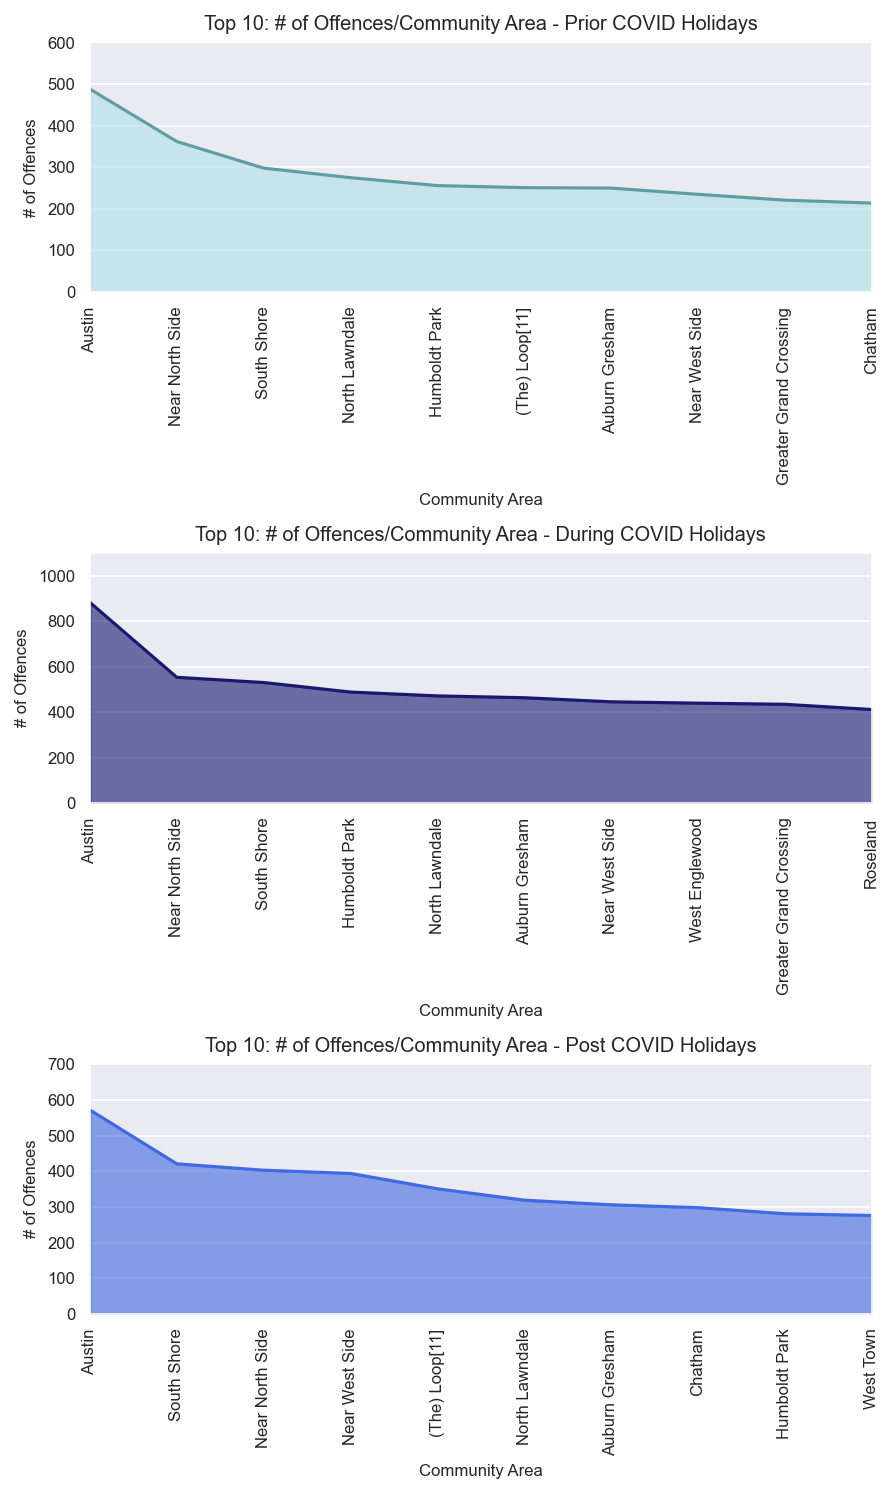

In [27]:

# Filter and group the data for each COVID period
prior = holiday_df.loc[(holiday_df['Community Area'] != 'Blank') & (holiday_df['COVID Period'] == 'Prior COVID Holidays')].groupby('Community Area')['Holiday_name'].count().sort_values(ascending=False).iloc[:10]
during = holiday_df.loc[(holiday_df['Community Area'] != 'Blank') & (holiday_df['COVID Period'] == 'During COVID Holidays')].groupby('Community Area')['Holiday_name'].count().sort_values(ascending=False).iloc[:10]
post = holiday_df.loc[(holiday_df['Community Area'] != 'Blank') & (holiday_df['COVID Period'] == 'Post COVID Holidays')].groupby('Community Area')['Holiday_name'].count().sort_values(ascending=False).iloc[:10]

# * Get the unique community_area and their count values
community_area = np.arange(len(prior))  # Using the same length for all COVID periods
prior_count = prior.values
during_count = during.values
post_count = post.values

# * Create separate figures for each COVID period
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# * Figure for Prior COVID Holidays
axes[0].fill_between(community_area, 0, prior_count, color='powderblue', alpha=0.6)
axes[0].plot(community_area, prior_count, color='cadetblue', linewidth=1.5)
axes[0].set_xticks(community_area)
axes[0].set_xticklabels(prior.index, rotation=90)
axes[0].set_xlabel('Community Area')
axes[0].set_ylabel('# of Offences')
axes[0].set_title('Top 10: # of Offences/Community Area - Prior COVID Holidays')
axes[0].set_xlim(community_area[0], community_area[-1])
axes[0].set_ylim(0, 600)
axes[0].grid(axis='x')

# * Figure for During COVID Holidays
axes[1].fill_between(community_area, 0, during_count, color='midnightblue',alpha=0.6)
axes[1].plot(community_area, during_count, color='midnightblue', linewidth=1.5)
axes[1].set_xticks(community_area)
axes[1].set_xticklabels(during.index, rotation=90)
axes[1].set_xlabel('Community Area')
axes[1].set_ylabel('# of Offences')
axes[1].set_title('Top 10: # of Offences/Community Area - During COVID Holidays')
axes[1].set_xlim(community_area[0], community_area[-1])
axes[1].set_ylim(0, 1100)
axes[1].grid(axis='x')

# * Figure for Post COVID Holidays
axes[2].fill_between(community_area, 0, post_count,color='royalblue',alpha=0.6)
axes[2].plot(community_area, post_count, color='royalblue', linewidth=1.5)
axes[2].set_xticks(community_area)
axes[2].set_xticklabels(post.index, rotation=90)
axes[2].set_xlabel('Community Area')
axes[2].set_ylabel('# of Offences')
axes[2].set_title('Top 10: # of Offences/Community Area - Post COVID Holidays')
axes[2].set_xlim(community_area[0], community_area[-1])
axes[2].set_ylim(0, 700)
axes[2].grid(axis='x')

# * Adjust spacing between subplots
plt.tight_layout()

# * Display the plot
plt.savefig("/Users/galbeeir/Desktop/git/crime_analysis/holiday_seasons/Images/top10_community_area.png")
plt.show()

#### Insights
* The top 3 crime community areas before, during and after COVID-19 were: Austin, South Shore, and Near North Side. 
* Interestingly, the census data below shows that relative to other community areas in Chicago, whilst these areas have a high percentage of assault, homicide, poverty level, and unemployment rate, they are still low, as opposed to Riverdale, Fuller Park, and Englewood. See census data from [Chicago Data Portal](https://data.cityofchicago.org/Health-Human-Services/Public-Health-Statistics-Selected-public-health-in/iqnk-2tcu) which was updated on February 4th, 2022 (during COVID-19)
    * **Below Tables**:
        - The top 3 community areas with crime before, during and after COVID.
        - The top 10 poverty community areas in Chicago.
        - The bottom 10 poverty community areas in Chicago.
* According to the following articles from [Chicago Business](https://www.chicagobusiness.com/crains-forum-safer-chicago/chicago-violence-problem-debate-safety-inequality#:~:text=is%20in%20crisis.%22-,Watch%20how%20the%20homicide%20rate%20changes%20over%20time,-A%20Flourish%20data){watch visual}, [Chicago Mag](https://www.chicagomag.com/city-life/july-2012/austin-chicagos-deadliest-neighborhood/), and [Property Club](https://propertyclub.nyc/article/most-dangerous-neighborhoods-in-chicago#:~:text=Austin%20is%20another%20one%20of,and%2020th%20in%20property%20crime.) Austin and South Shore are at the top 10 of crime destribution relative to other community areas. 


In [28]:
url = "https://data.cityofchicago.org/resource/iqnk-2tcu.json?$query=SELECT%0A%20%20%60community_area%60%2C%0A%20%20%60community_area_name%60%2C%0A%20%20%60assault_homicide%60%2C%0A%20%20%60firearm_related%60%2C%0A%20%20%60below_poverty_level%60%2C%0A%20%20%60crowded_housing%60%2C%0A%20%20%60dependency%60%2C%0A%20%20%60no_high_school_diploma%60%2C%0A%20%20%60per_capita_income%60%2C%0A%20%20%60unemployment%60%0AORDER%20BY%0A%20%20%60below_poverty_level%60%20DESC%20NULL%20LAST%2C%0A%20%20%60firearm_related%60%20DESC%20NULL%20LAST%2C%0A%20%20%60crowded_housing%60%20DESC%20NULL%20LAST"
poverty_chicago = pd.DataFrame(requests.get(url).json())

##### Community Areas from Analysis with High Crime Incidents
- Disclaimer, the data was updated on February 4th, 2022 and does not include data from 2023. 

In [29]:
poverty_chicago.loc[(poverty_chicago['community_area_name'] == 'Austin') |(poverty_chicago['community_area_name'] == 'South Shore') | (poverty_chicago['community_area_name'] == 'Near North Side')]

,community_area,community_area_name,assault_homicide,firearm_related,below_poverty_level,crowded_housing,dependency,no_high_school_diploma,per_capita_income,unemployment
11,43,South Shore,33.4,30,31.5,2.9,37.6,14.9,18366,17.7
18,25,Austin,34.4,28.5,27,5.7,39,25,15920,21
51,8,Near North Side,3.7,3.2,13.4,2,23.3,3.4,87163,5.2


In [30]:
poverty_chicago[:10]

,community_area,community_area_name,assault_homicide,firearm_related,below_poverty_level,crowded_housing,dependency,no_high_school_diploma,per_capita_income,unemployment
0,54,Riverdale,33,32.8,61.4,5.1,50.2,24.6,8535,26.4
1,37,Fuller Park,49.6,22.6,55.5,4.5,38.2,33.7,9016,40
2,68,Englewood,45.1,44.9,42.2,4.8,43.4,29.4,11993,21.3
3,26,West Garfield Park,40,36,40.3,8.9,42.5,26.2,10951,25.2
4,27,East Garfield Park,38.4,37.1,39.7,7.5,43.2,26.2,13596,16.4
5,40,Washington Park,44.6,39.5,39.1,4.9,40.9,28.3,13087,23.2
6,29,North Lawndale,46.7,37.6,38.6,7.2,40.9,30.4,12548,18.5
7,36,Oakland,18.9,12.6,38.1,3.5,40.5,17.6,19312,26.6
8,34,Armour Square,1.8,1.8,35.8,5.9,37.9,37.5,16942,11.6
9,23,Humboldt Park,29,22.7,32.6,11.2,38.3,36.8,13391,12.3


In [31]:
poverty_chicago[-10:]

,community_area,community_area_name,assault_homicide,firearm_related,below_poverty_level,crowded_housing,dependency,no_high_school_diploma,per_capita_income,unemployment
67,56,Garfield Ridge,9.9,9.2,9,2.6,39.5,19.4,24684,8.1
68,17,Dunning,3.7,5.2,8.3,4.8,34.9,18,26347,8.6
69,5,North Center,1,1,7.1,0.2,25.5,5.4,51615,4.5
70,11,Jefferson Park,4.8,4.2,6.4,1.9,34.4,13.5,27280,9
71,12,Forest Glen,3.3,6.2,6.1,1.3,40.6,6.3,41509,5.5
72,64,Clearing,9.4,12.7,5.9,3.4,36.4,18.5,23920,9.6
73,10,Norwood Park,4.7,8.7,5.9,2.3,40.6,13.5,31659,7.3
74,72,Beverly,3.5,3.5,5.2,0.7,38.7,5.1,40107,7.8
75,9,Edison Park,0,7.1,5.1,0.6,36.6,8.5,38337,7.4
76,74,Mount Greenwood,2.2,7.4,3.1,1.1,37,4.5,34221,6.9


In [32]:
holiday_df

,ID,Case Number,Date,Year,Updated On,Primary Type,Location Description,Arrest,Domestic,Police District,Ward,Community Area,Latitude,Longitude,Is_Holiday,Holiday_name,COVID Period
0,11703465,JC282903,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,THEFT,STREET,False,False,12,25,Near West Side,41.863590,-87.645310,True,Memorial Day,Prior COVID Holidays
1,11702897,JC282303,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,CRIMINAL DAMAGE,STREET,False,False,15,37,Austin,41.886642,-87.763405,True,Memorial Day,Prior COVID Holidays
2,11703024,JC281136,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,BATTERY,RESIDENCE,False,True,16,38,Portage Park,41.964096,-87.786766,True,Memorial Day,Prior COVID Holidays
3,11703083,JC282234,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,THEFT,VEHICLE NON-COMMERCIAL,False,False,14,32,Logan Square,41.928413,-87.688710,True,Memorial Day,Prior COVID Holidays
4,11703136,JC281123,2019-05-27 21:00:00,2019,2019-06-30 15:56:27,BATTERY,HOTEL/MOTEL,False,True,18,42,Near North Side,41.894950,-87.623620,True,Memorial Day,Prior COVID Holidays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33920,12990041,JG160295,2023-02-20 14:30:00,2023,2023-02-27 15:54:32,THEFT,RESIDENCE,False,False,12,25,Lower West Side,41.859135,-87.652220,True,Washington's Birthday,Post COVID Holidays
33921,12988798,JG159833,2023-02-20 14:30:00,2023,2023-02-27 15:54:32,THEFT,STREET,False,False,9,15,New City,41.815292,-87.666374,True,Washington's Birthday,Post COVID Holidays
33922,12988764,JG159609,2023-02-20 14:28:00,2023,2023-02-27 15:54:32,WEAPONS VIOLATION,CONVENIENCE STORE,True,False,2,20,Washington Park,41.786606,-87.622250,True,Washington's Birthday,Post COVID Holidays
33923,12997086,JG166516,2023-02-20 14:00:00,2023,2023-03-03 15:47:46,ROBBERY,CRIMINAL TRIBES ACT,False,False,1,42,(The) Loop[11],41.878640,-87.627690,True,Washington's Birthday,Post COVID Holidays


##### What happened with each Offence type over Holiday Seasons Before, After, and During COVID-19? 

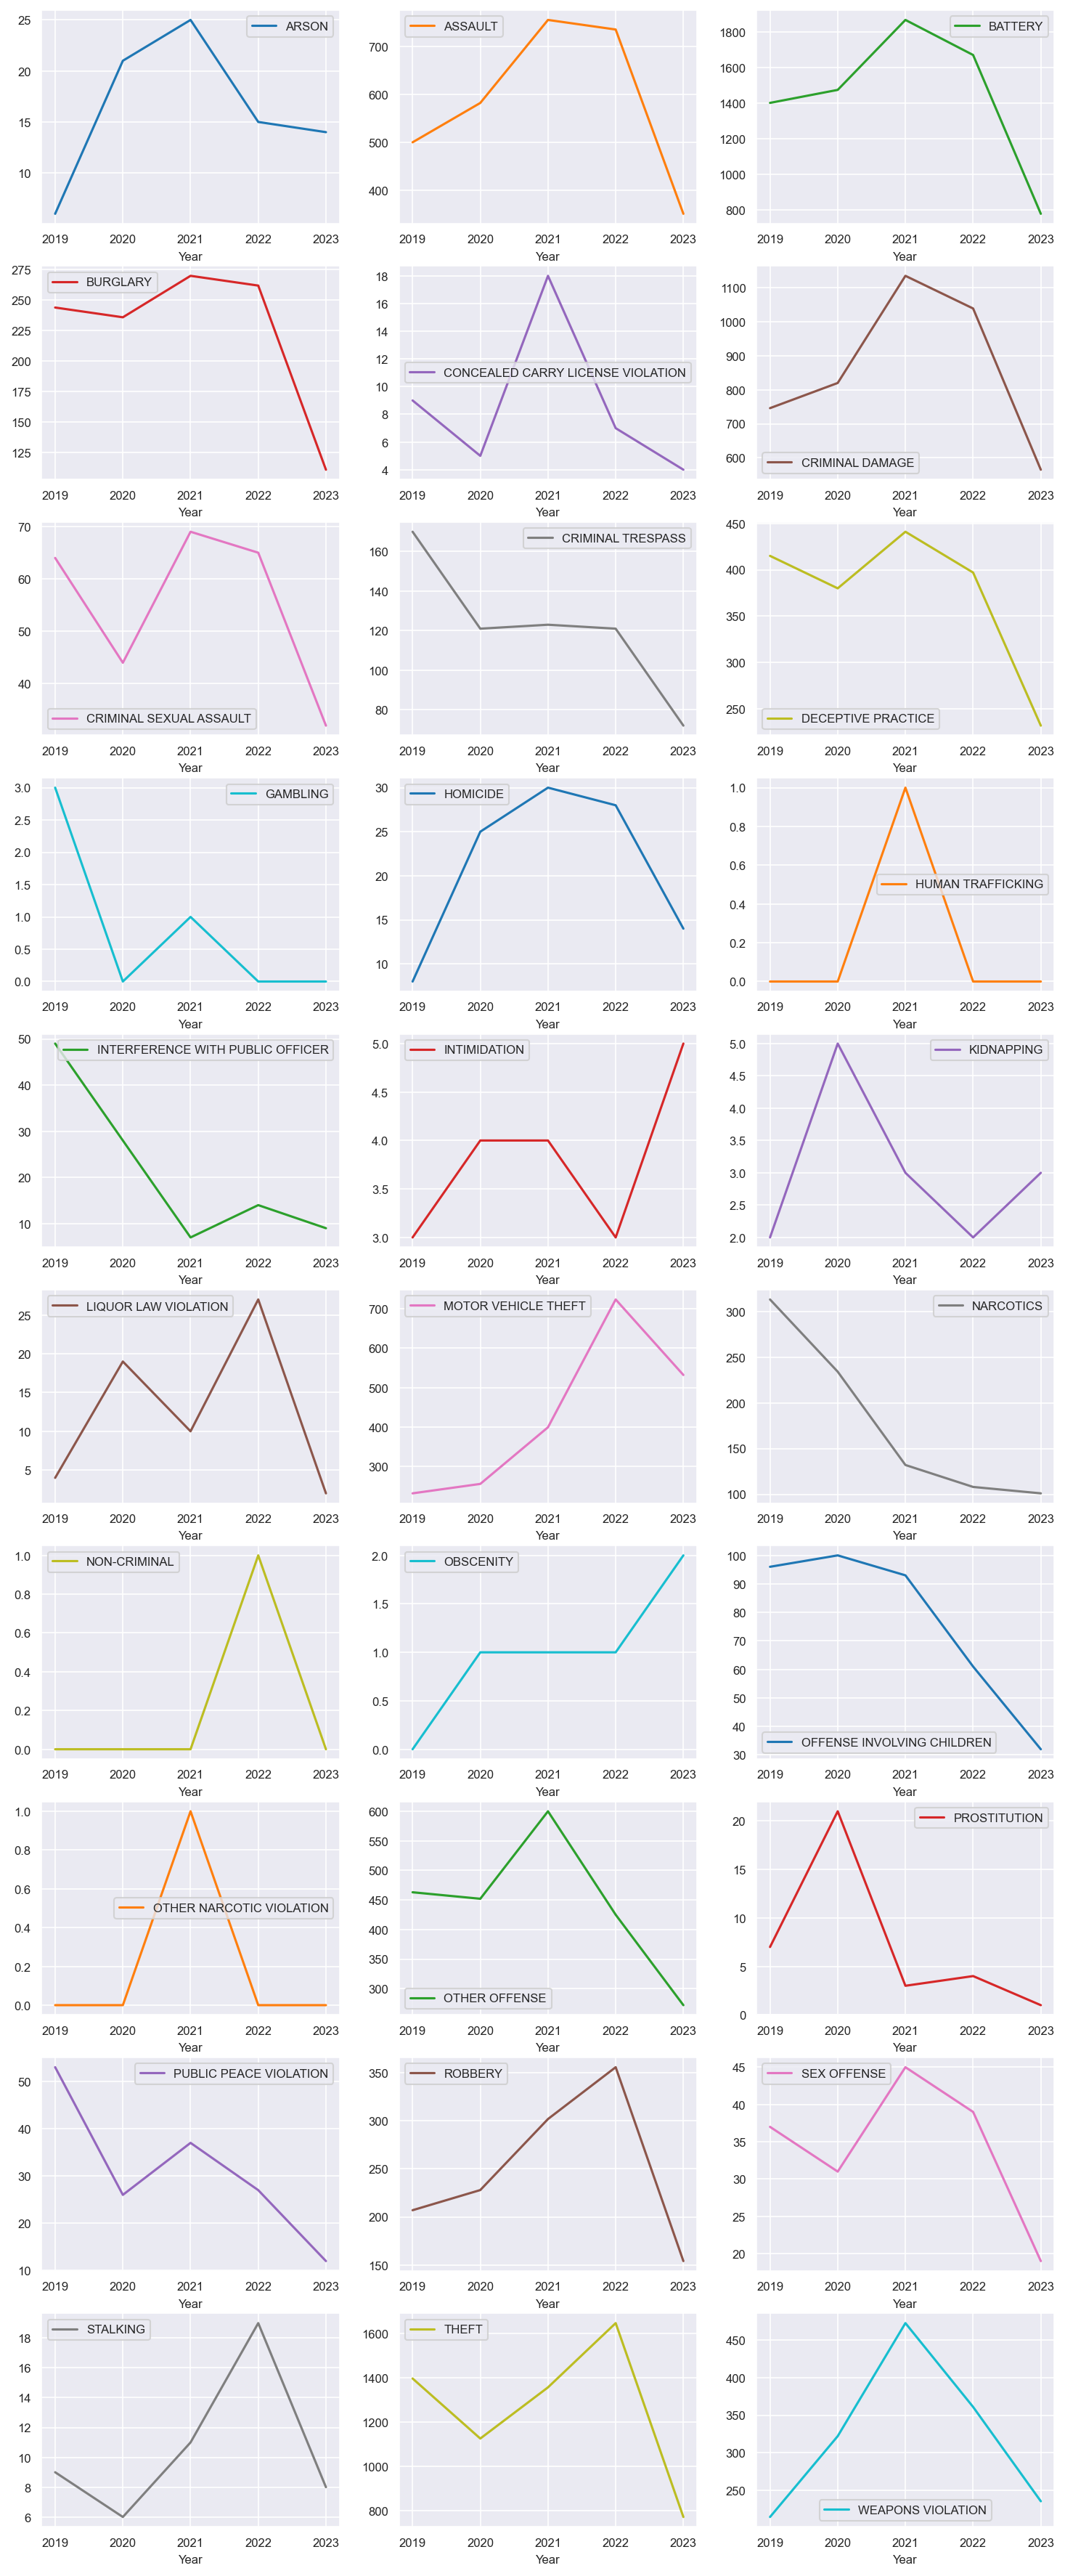

In [33]:
crimes_count_prior = holiday_df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=holiday_df['Date'].dt.year, fill_value=0)
crimes_count_prior.plot(figsize=(12,30), subplots=True, layout=(-1, 3), sharex=False, sharey=False, xlabel='Year')
plt.savefig("/Users/galbeeir/Desktop/git/crime_analysis/holiday_seasons/Images/crime_t_holiday_seasons.png")
plt.show()

#### Insights
* The general trend of crime types over the years of holiday seasons prior to, during, and post-COVID-19 shows that:
    * The amount of incidents has decreased between 2022-2023 (it might be because the year 2023 is yet to be concluded)
    * In most crime types, there was a steep increase in crime incidents between 2020-2021.
    * If there wasn't a steep increase, it is likely because these crime types rely on outdoor elements, which lockdown restricted. 